In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_fangyou = pd.read_csv("../Data/Fangyou_data/Cleaned/combined_using_similar_columns.csv")
data_fangyou['Data_source'] = 'Best et al. (in prep)'

data_BH = pd.read_csv("../Data/Best&Heckman/BestHeckman+SDSS+wise+LOFAR_better.csv")
# Only selecting data with a classification
data_BH = data_BH[data_BH['Classification'] != 'Radio-loud AGN'] 
data_BH['Data_source'] = 'Best et al. (2012)'

data_mightee = pd.read_csv("../Data/MIGHTEE/Classification/final_gaussian_radio.csv")
# Dropping nan classifications
data_mightee = data_mightee[data_mightee['Classification'].notna()]
data_mightee['Data_source'] = 'Whittam et al. (2022)'

data = pd.concat([data_fangyou, data_BH, data_mightee]).reset_index(drop=True)

In [3]:
drop_columns = ['Source_Name',
 'RA',
 'DEC',
 'E_Total_flux',
 'E_Peak_flux',
 'S_Code',
 'EBV',
 'FUV_flux_corr',
 'FUV_fluxerr_corr',
 'NUV_fluxerr_corr',
 'u_fluxerr_corr',
 'Bw_fluxerr_corr',
 'R_fluxerr_corr',
 'I_fluxerr_corr',
 'z_fluxerr_corr',
 'z_Subaru_flux_corr',
 'z_Subaru_fluxerr_corr',
 'y_fluxerr_corr',
 'J_fluxerr_corr',
 'H_fluxerr_corr',
 'K_fluxerr_corr',
 'Ks_fluxerr_corr',
 'ch1_fluxerr_corr',
 'ch2_fluxerr_corr',
 'ch3_fluxerr_corr',
 'ch4_fluxerr_corr',
 'FErr_MIPS_24_u',
 'FErr_MIPS_24_l',
 'FErr_PACS_100_u',
 'FErr_PACS_100_l',
 'FErr_PACS_160_u',
 'FErr_PACS_160_l',
 'FErr_SPIRE_250_u',
 'FErr_SPIRE_250_l',
 'FErr_SPIRE_350_u',
 'FErr_SPIRE_350_l',
 'FErr_SPIRE_500_u',
 'FErr_SPIRE_500_l',
 'ap_to_model_err_z_Subaru',
 'ap_to_model_err_z',
 'Mass_median',
 'Mass_l68',
 'Mass_u68',
 'Source',
 'AGN_final',
 'RadioAGN_final',
 'Classification',
 'Radio_excess',
 'AGNfrac_af',
 'AGNfrac_af_16',
 'AGNfrac_cg_s_16',
 'Xray',
 'Opt_spec',
 'IRAGN',
 'Extended_radio',
 'z_rcs_flux_corr',
 'z_hsc_flux_corr',
 'i_hsc_flux_corr',
 'i_rcs_flux_corr',
 'i_flux_corr',
 'y_hsc_flux_corr',
 'r_flux_corr',
 'r_hsc_flux_corr',
 'r_rcs_flux_corr',
 'ch1_swire_flux_corr',
 'ch2_swire_flux_corr',
 'ch3_swire_flux_corr',
 'ch4_swire_flux_corr',
 'ch1_servs_flux_corr',
 'ch2_servs_flux_corr',
 'g_fluxerr_corr',
 'r_fluxerr_corr',
 'i_fluxerr_corr',
 'g_hsc_flux_corr',
 'g_hsc_fluxerr_corr',
 'r_hsc_fluxerr_corr',
 'i_hsc_fluxerr_corr',
 'z_hsc_fluxerr_corr',
 'y_hsc_fluxerr_corr',
 'nb921_hsc_fluxerr_corr',
 'ch1_swire_fluxerr_corr',
 'ch2_swire_fluxerr_corr',
 'ch3_swire_fluxerr_corr',
 'ch4_swire_fluxerr_corr',
 'ch1_servs_fluxerr_corr',
 'ch2_servs_fluxerr_corr',
 'ap_to_model_err_g',
 'ap_to_model_err_r',
 'g_rcs_flux_corr',
 'g_rcs_fluxerr_corr',
 'r_rcs_fluxerr_corr',
 'i_rcs_fluxerr_corr',
 'z_rcs_fluxerr_corr',
 'RAJ2000',
 'DEJ2000',
 'SimbadName',
 'wise_ra',
 'wise_dec',
 'tmass_key',
 'Unnamed: 0',
 'S_INT14',
 'S_PEAK14',]
                
                
data = data.drop(columns=drop_columns)

In [4]:
len(data.columns)

27

In [5]:
# Changing the order so it is roughly from low wavelength to high wavelength
data = data[['NUV_flux_corr', 'u_flux_corr',
       'Bw_flux_corr', 'g_flux_corr', 'R_flux_corr', 'I_flux_corr', 'z_flux_corr', 'nb921_hsc_flux_corr',
       'y_flux_corr', 'J_flux_corr', 'H_flux_corr', 'K_flux_corr',
       'Ks_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr',
       'ch4_flux_corr', 'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250',
       'F_SPIRE_350', 'F_SPIRE_500', 'Peak_flux', 'Total_flux', 'Z_BEST', 'Data_source']]

In [6]:
mapping = {'Total_flux': 'Total 150 MHz',
           'Peak_flux': 'Peak 150 MHz', 
           'NUV_flux_corr': 'NUV', 
           'u_flux_corr': 'u',
           'Bw_flux_corr': r'$B_w$', 
           'R_flux_corr': 'R', 
           'I_flux_corr': 'I', 
           'z_flux_corr': 'z',
           'y_flux_corr': 'y', 
           'J_flux_corr': 'J', 
           'H_flux_corr': 'H', 
           'K_flux_corr': 'K',
           'Ks_flux_corr': r'$K_s$', 
           'ch1_flux_corr': 'ch1', 
           'ch2_flux_corr': 'ch2', 
           'ch3_flux_corr': 'ch3',
           'ch4_flux_corr': 'ch4', 
           'F_MIPS_24': 'MIPS24', 
           'F_PACS_100': 'PACS100', 
           'F_PACS_160': 'PACS160', 
           'F_SPIRE_250': 'SPIRE250',
           'F_SPIRE_350': 'SPIRE350', 
           'F_SPIRE_500': 'SPIRE500', 
           'Z_BEST': 'Redshift', 
           'g_flux_corr': 'g',
           'nb921_hsc_flux_corr': 'NB921'}

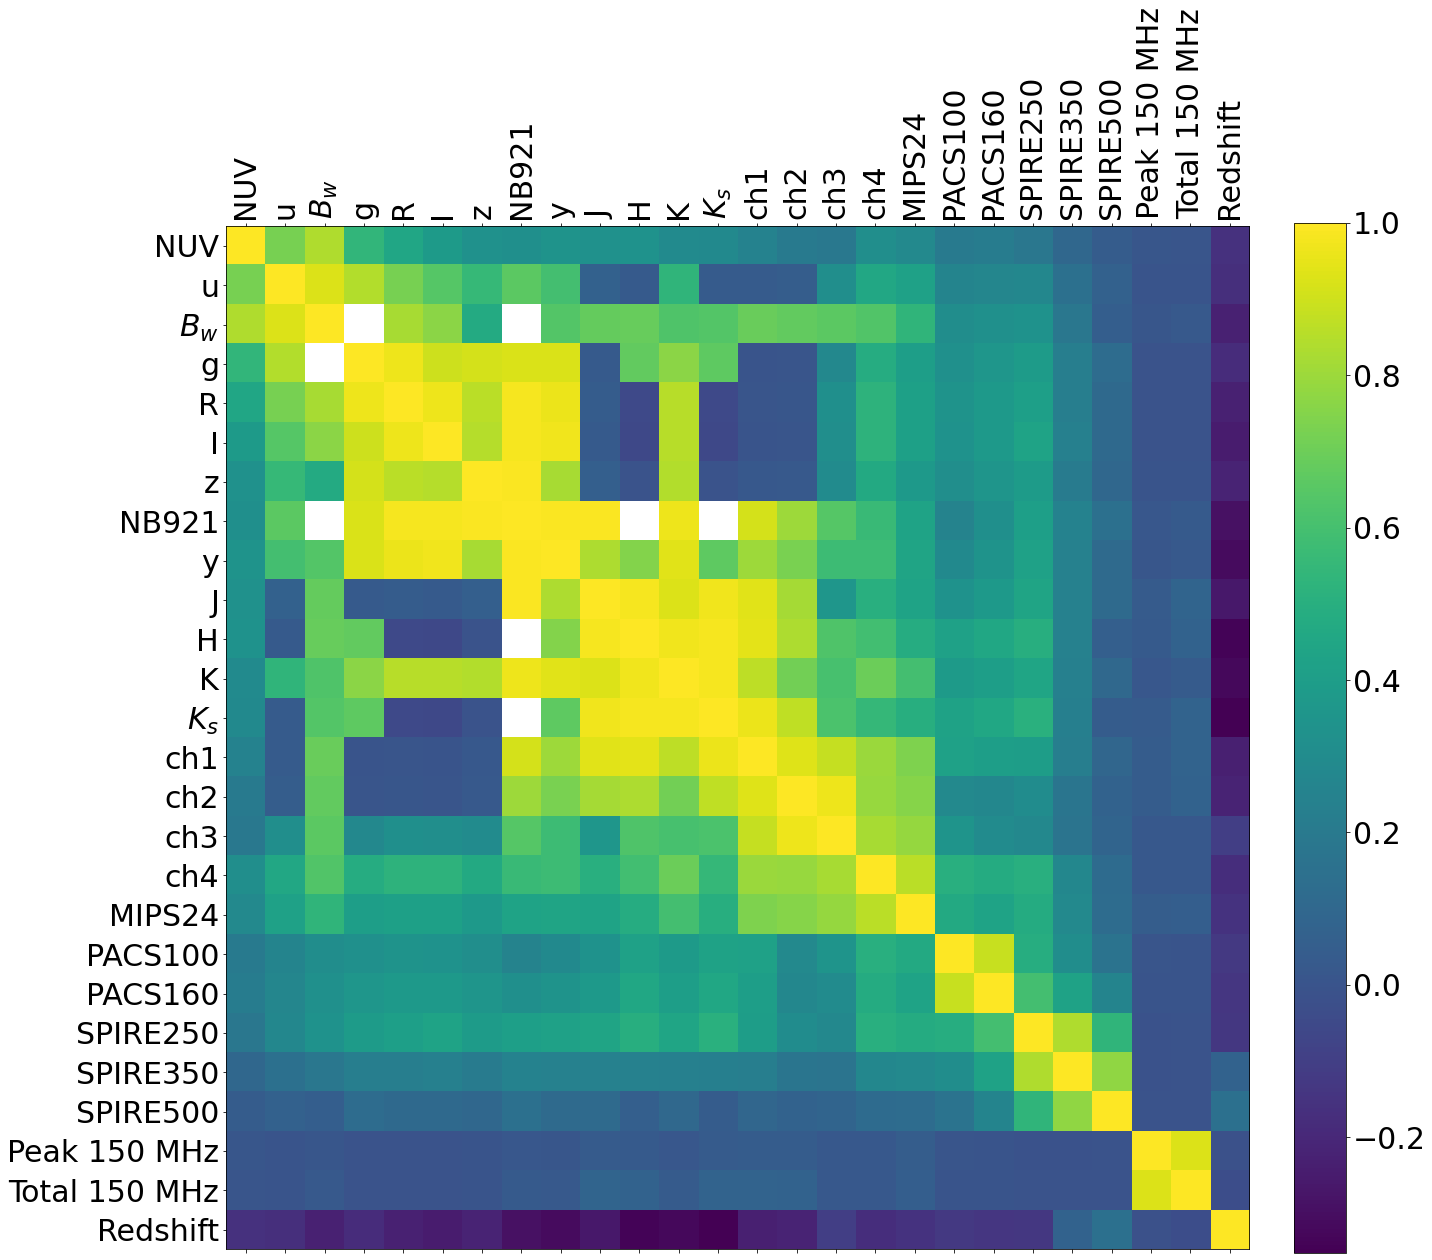

In [7]:
import matplotlib.pyplot as plt
import matplotlib 

# Set font size
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(20, 20))
corr = data.drop(columns='Data_source').corr()

# Creating labels
columns = corr.columns.map(mapping)

corr_plot = ax.matshow(corr)
plt.colorbar(corr_plot, fraction=0.046, pad=0.04)
plt.xticks(range(len(columns)), columns, rotation='vertical')
plt.yticks(range(len(columns)), columns)

plt.tight_layout()

plt.savefig("Correlation.pdf")
plt.savefig("Correlation.png")
plt.show()

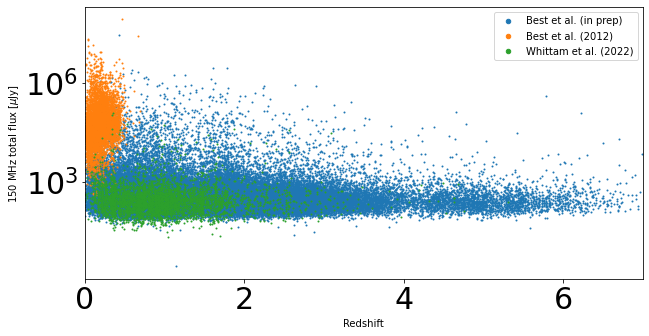

In [8]:
feature1 = 'Z_BEST'
feature2 = 'Total_flux'

plt.figure(figsize=(10,5))
    
plt.scatter(data_fangyou[feature1], data_fangyou[feature2], s=1, label='Best et al. (in prep)')
plt.scatter(data_BH[feature1], data_BH[feature2], s=1, label='Best et al. (2012)')
plt.scatter(data_mightee[feature1], data_mightee[feature2], s=1, label='Whittam et al. (2022)')

plt.xlabel('Redshift')
plt.ylabel(r'150 MHz total flux [$\mu$Jy]')
plt.yscale('log')
plt.xlim(0,7)
lgnd = plt.legend()
for l in lgnd.legendHandles:
    l._sizes = [20]

In [9]:
from matplotlib import rcParams, rcParamsDefault
rcParams.update(rcParamsDefault)

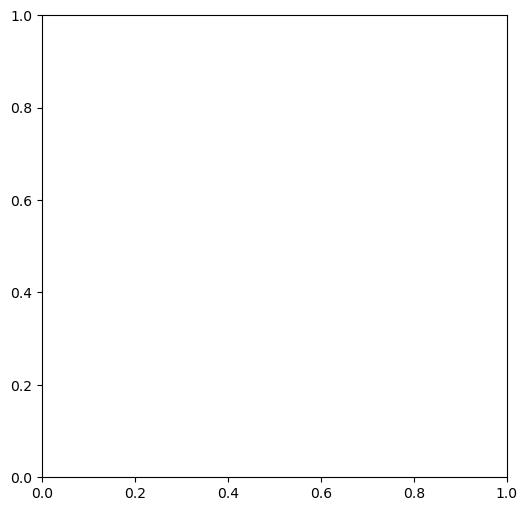

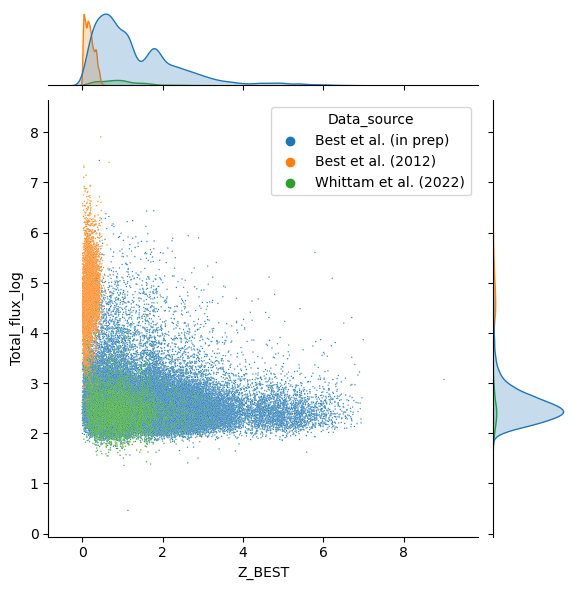

In [10]:
data['Total_flux_log'] = np.log10(data['Total_flux'])

feature1 = 'Z_BEST'
feature2 = 'Total_flux_log'

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.jointplot(data=data, x=feature1, y=feature2, hue='Data_source', s=1)
#sns.scatterplot(data=data, x=feature1, y=feature2, hue='Data_source', s=1)
#sns.histplot(data=data, x=feature1, y=feature2, hue='Data_source', bins=500, pthresh=.01, cmap="mako")
#sns.kdeplot(data=data, x=feature1, y=feature2, hue='Data_source', levels=50, common_norm=False, fill=True)

In [55]:
feature1 = 'Z_BEST'
feature2 = 'Total_flux'

data['Total_flux_log'] = np.log10(data['Total_flux'])

s = sns.jointplot(data=data, x=feature1, y='Total_flux_log', hue='Data_source', 
                  kind='hist', marginal_ticks=True, xlim=(0, 7), xlim=(50,5*10**7),
                 marginal_kws=dict(bins=100, common_bins=True, stat='probability', common_norm=False))
#s.plot_joint(sns.kdeplot, zorder=3, levels=5)
s.plot_joint(sns.scatterplot, s=10)
s.set_axis_labels(r"Redshift", r"$S_{tot, 150MHz} \; [\mu$Jy]")

# Marginal axes labels
s.ax_marg_y.set_xlabel('')
s.ax_marg_x.set_ylabel('')

# Setting figsize
s.fig.set_figwidth(10)
s.fig.set_figheight(5)

# Removing legend title
s.ax_joint.legend_.set_title(None)

# Setting y-ticks
s.ax_joint.set_yticklabels(['', r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$', r'$10^8$'])

# Limit z
#s.set()

# Saving figure
s.savefig("Z_vs_total_flux.pdf")
s.savefig("Z_vs_total_flux.png")

plt.show()

SyntaxError: keyword argument repeated: xlim (3004377581.py, line 6)

In [12]:
labels = ['SFG', 'LERG', 'RQ', 'HERG']
cm = [
    [0.9572, 0.8636, 0.6767, 0.3021],
    [],
    [],
    [],
]

AttributeError: 'list' object has no attribute 'shape'

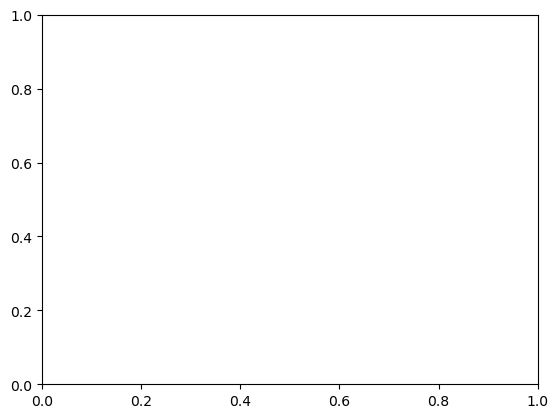

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

## Score dependence

In [64]:
# Order is SFG, LERG, RQ, HERG

count_original = [35922, 12767, 6870, 1810]
count_BH = [2912, 9771, 478]
count_MIGHTEE = [2790, 924, 410, 246]

precision_original = [0.9242, 0.8681, 0.7858, 0.6433]
precision_original_std = [0.0040, 0.0146, 0.0040, 0.07461]
recall_original = [0.9617, 0.8018, 0.6974, 0.3735]
recall_original_std = [0.0026, 0.0164, 0.0328, 0.0507]
f1_original = [0.9425, 0.8335, 0.7386, 0.4719]
f1_original_std = [0.0023, 0.0117, 0.0220, 0.0589]

precision_BH = [0.8897, 0.9407, 0.5953]
precision_BH_std = [0.0326, 0.0087, 0.1539]
recall_BH = [0.9004, 0.9688, 0.1784]
recall_BH_std = [0.0264, 0.0092, 0.0617]
f1_BH = [0.8944, 0.9545, 0.2711]
f1_BH_std = [0.0187, 0.0053, 0.0844]

precision_MIGHTEE = [0.7856, 0.5976, 0.6944, 0.5055]
precision_MIGHTEE_std = [0.0249, 0.0613, 0.1277, 0.2693]
recall_MIGHTEE = [0.9108, 0.5587, 0.3368, 0.1386]
recall_MIGHTEE_std = [0.0253, 0.0753, 0.1006, 0.0876]
f1_MIGHTEE = [0.8434, 0.5765, 0.4431, 0.2083]
f1_MIGHTEE_std = [0.0220, 0.0655, 0.0987, 0.1156]

text = ['SFG', 'LERG', 'RQ', 'HERG']
text_BH = ['SFG', 'LERG', 'HERG']

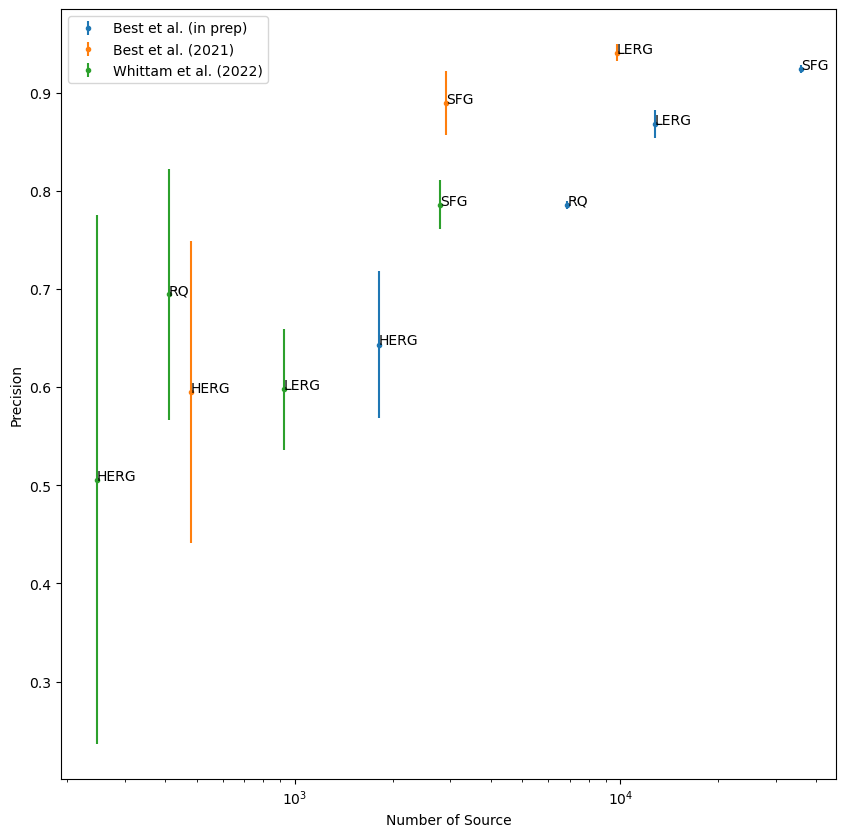

In [65]:
plt.figure(figsize=(10,10))
plt.errorbar(x=count_original, y=precision_original, yerr=precision_original_std, linestyle='', marker='.', label='Best et al. (in prep)')
plt.errorbar(x=count_BH, y=precision_BH, yerr=precision_BH_std, linestyle='', marker='.', label='Best et al. (2021)')
plt.errorbar(x=count_MIGHTEE, y=precision_MIGHTEE, yerr=precision_MIGHTEE_std, linestyle='', marker='.', label='Whittam et al. (2022)')
plt.xscale('log')
plt.xlabel("Number of Source")
plt.ylabel("Precision")
plt.legend()

for i, txt in enumerate(text):
    plt.annotate(txt, (count_original[i], precision_original[i]))
    plt.annotate(txt, (count_MIGHTEE[i], precision_MIGHTEE[i]))
for i, txt in enumerate(text_BH):
    plt.annotate(txt, (count_BH[i], precision_BH[i]))

plt.show()

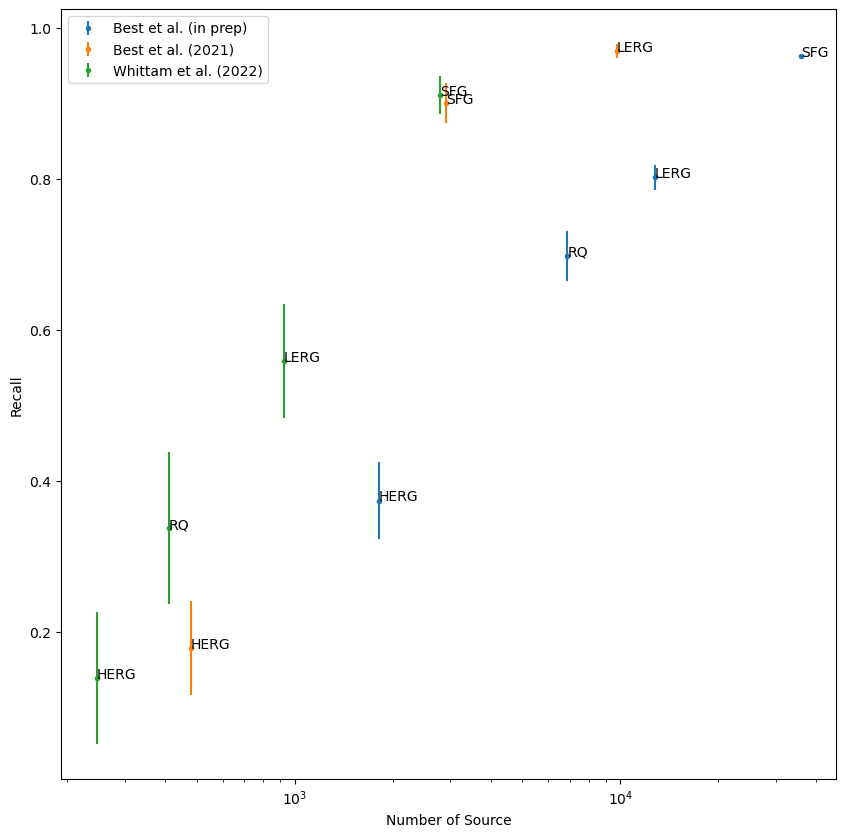

In [66]:
plt.figure(figsize=(10,10))
plt.errorbar(x=count_original, y=recall_original, yerr=recall_original_std, linestyle='', marker='.', label='Best et al. (in prep)')
plt.errorbar(x=count_BH, y=recall_BH, yerr=recall_BH_std, linestyle='', marker='.', label='Best et al. (2021)')
plt.errorbar(x=count_MIGHTEE, y=recall_MIGHTEE, yerr=recall_MIGHTEE_std, linestyle='', marker='.', label='Whittam et al. (2022)')
plt.xscale('log')
plt.xlabel("Number of Source")
plt.ylabel("Recall")
plt.legend()

for i, txt in enumerate(text):
    plt.annotate(txt, (count_original[i], recall_original[i]))
    plt.annotate(txt, (count_MIGHTEE[i], recall_MIGHTEE[i]))
for i, txt in enumerate(text_BH):
    plt.annotate(txt, (count_BH[i], recall_BH[i]))
    
plt.show()

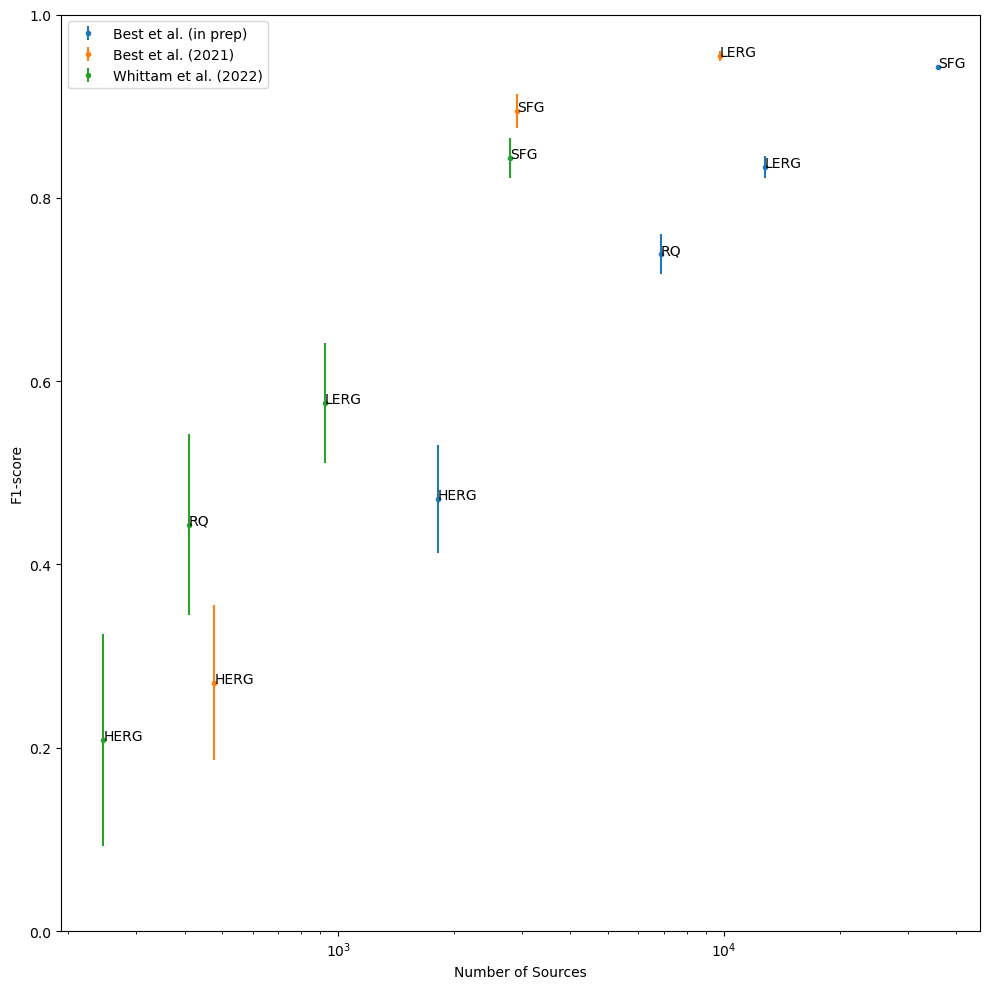

In [67]:
plt.figure(figsize=(10,10))
plt.errorbar(x=count_original, y=f1_original, yerr=f1_original_std, linestyle='', marker='.', label='Best et al. (in prep)')
plt.errorbar(x=count_BH, y=f1_BH, yerr=f1_BH_std, linestyle='', marker='.', label='Best et al. (2021)')
plt.errorbar(x=count_MIGHTEE, y=f1_MIGHTEE, yerr=f1_MIGHTEE_std, linestyle='', marker='.', label='Whittam et al. (2022)')
plt.xscale('log')
plt.xlabel("Number of Sources")
plt.ylabel("F1-score")
plt.legend()

for i, txt in enumerate(text):
    plt.annotate(txt, (count_original[i], f1_original[i]))
    plt.annotate(txt, (count_MIGHTEE[i], f1_MIGHTEE[i]))
for i, txt in enumerate(text_BH):
    plt.annotate(txt, (count_BH[i], f1_BH[i]))

plt.ylim(0,1)
plt.tight_layout()
plt.savefig('count_dependent_metric.pdf')
plt.show()

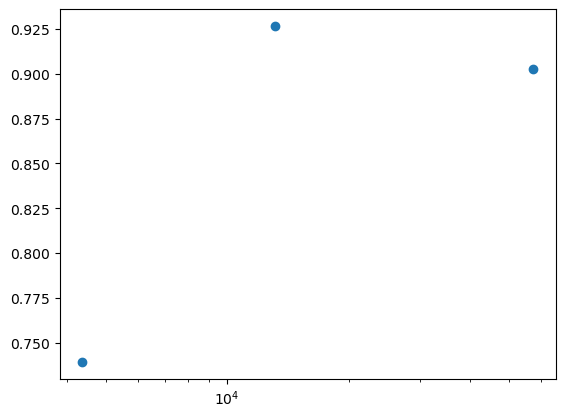

In [18]:
# Additionally we can look at accuracies of whole datasets, but this doesn't work since MIGHTEE has only 3 classes, 
# Additionally accuracy is dominated by data-imbalance within a dataset, so this is useless
counts = [57369, 13161, 4370]
accuracies = [0.9027, 0.92667, 0.7393]

plt.scatter(x=counts, y=accuracies)
plt.xscale('log')

In [19]:
# We can also look at all the data instead, then we have a much simpler plot
# Order is SFG, LERG, RQ, HERG

count = [62342, 23462, 7280, 2056]

precision = [0.9167, 0.8915, 0.7855, 0.6181]
precision_std = [0.0112, 0.0229, 0.0574, 0.2054]
recall = [0.9573, 0.8636, 0.6767, 0.3021]
recall_std = [0.0101, 0.0281, 0.0709, 0.1347]
f1 = [0.9365, 0.8770, 0.7249, 0.3968]
f1_std = [0.0078, 0.0185, 0.0541, 0.1515]

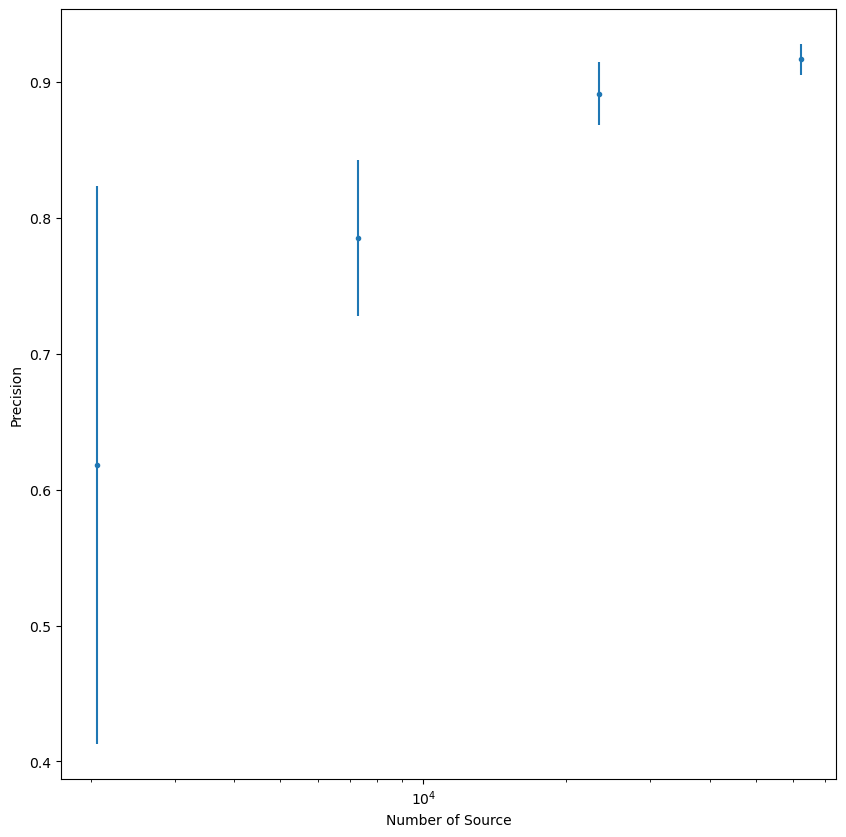

In [20]:
plt.figure(figsize=(10,10))
plt.errorbar(x=count, y=precision, yerr=precision_std, linestyle='', marker='.')
plt.xscale('log')
plt.xlabel("Number of Source")
plt.ylabel("Precision")
plt.show()

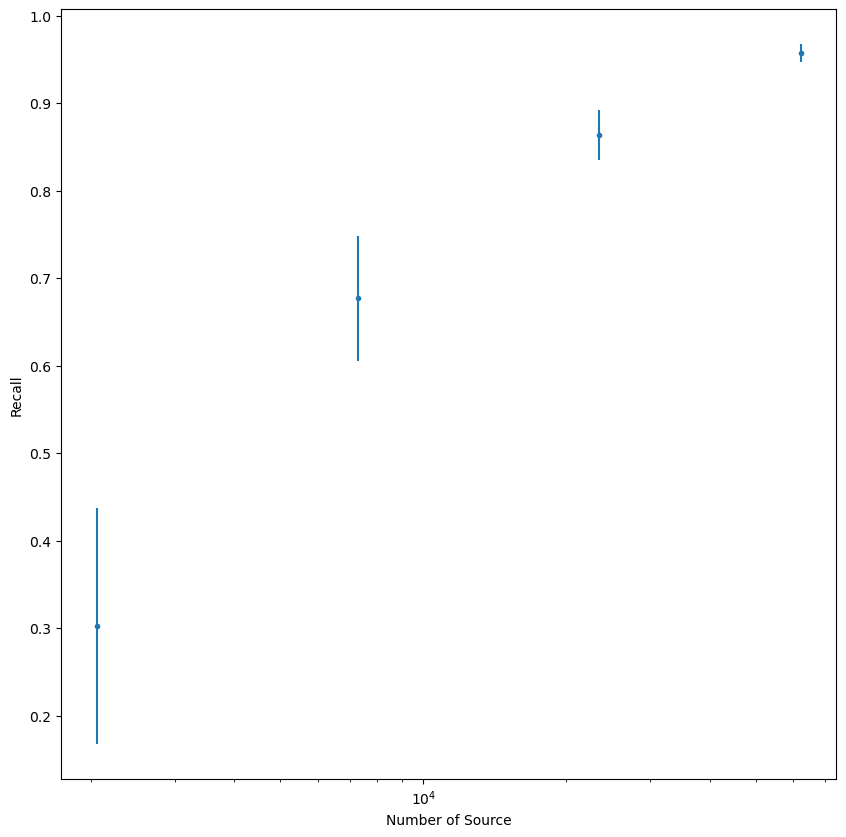

In [21]:
plt.figure(figsize=(10,10))
plt.errorbar(x=count, y=recall, yerr=recall_std, linestyle='', marker='.')
plt.xscale('log')
plt.xlabel("Number of Source")
plt.ylabel("Recall")
plt.show()

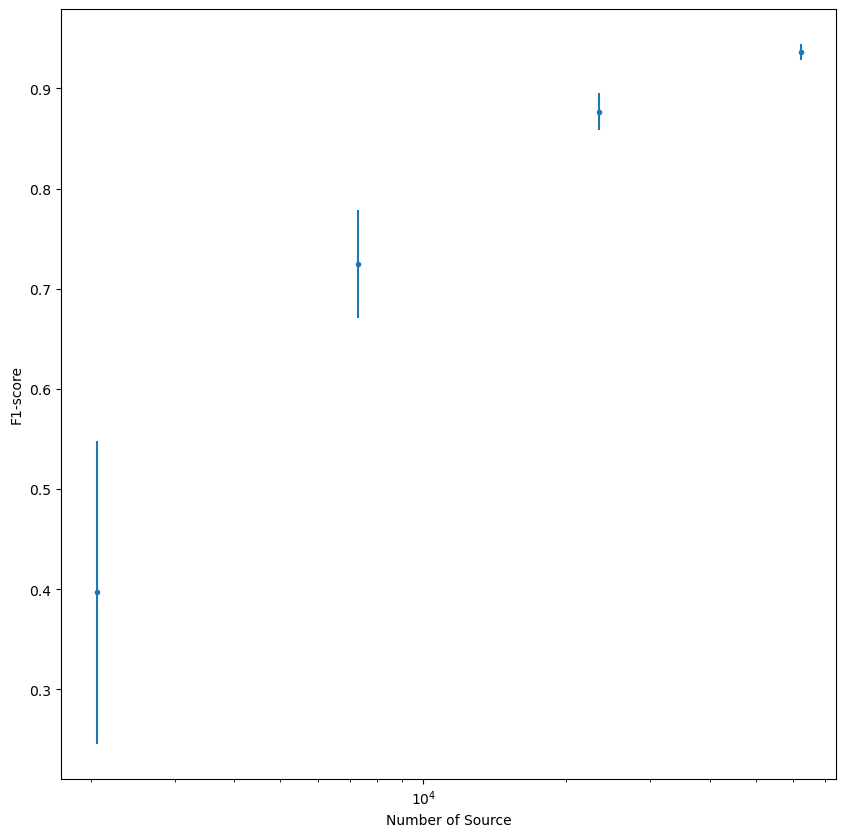

In [22]:
plt.figure(figsize=(10,10))
plt.errorbar(x=count, y=f1, yerr=f1_std, linestyle='', marker='.')
plt.xscale('log')
plt.xlabel("Number of Source")
plt.ylabel("F1-score")
plt.show()

In [42]:
import numpy as np

In [48]:
k = 4
x = np.random.randint(0,k+1,10**5)/k
print(x.mean(), x.std())

0.5006675 0.35329722535529484


In [51]:
np.unique(x)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [66]:
p = x.sum()/x.size
print(np.sqrt((p*(1-p))/x.size))

0.0015811356993471496


In [73]:
np.unique(x)

array([0. , 0.5, 1. ])

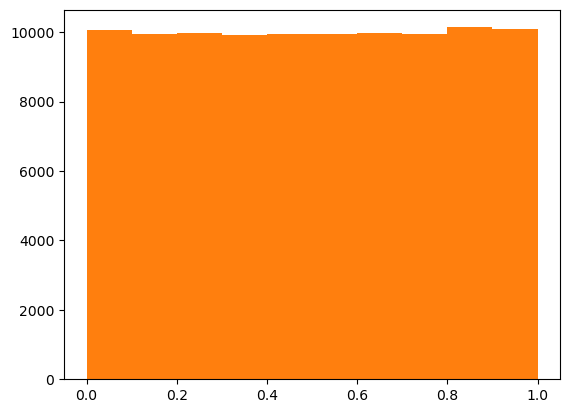

In [94]:
plt.hist(x)
plt.show()

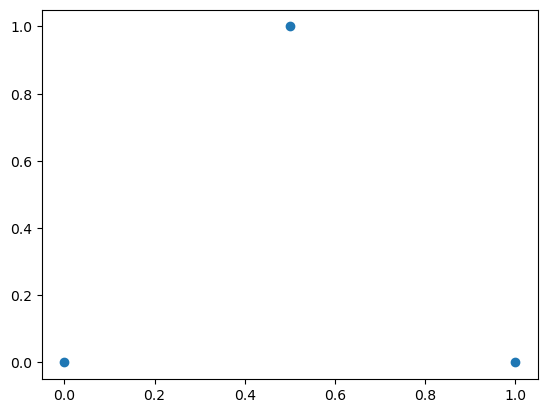

In [52]:
x= [0, 0.5, 1]
y = [0, 1, 0]

plt.scatter(x,y)